TikTok is one of the most popular social media apps today. It is famous for its short videos. People often use this app to watch entertaining and funny videos. Despite its entertaining content, this application is not liked by everyone. If you skim through its reviews, you’ll find a mixture of hate and support for TikTok all over the world. So, let’s analyze TikTok reviews to find out what people feel about the content of this app.

The dataset I am using here for the task of TikTok reviews sentiment analysis is downloaded from Kaggle. It was originally collected from TikTok reviews on Google Play Store.

Now let’s import the necessary Python libraries and dataset to begin this task:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\TikTok Reviews Sentiment Analysis using Python (NLP)\tiktok_google_play_reviews.csv")
print(data.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            reviewId        userName  \
0  gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...    MR LOL GAMER   
1  gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...     Dino Kljako   
2  gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...  Olivia Harding   
3  gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...         Keli We   
4  gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...    Mavis Kotoka   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a/AATXAJ...   
3  https://play-lh.googleusercontent.com/a-/AOh14...   
4  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                             content  score  thumbsUpCount  \
0                                               Good      5              0   
1  Awesome app! Too many people on it where it's ...      5              0

On the first impressions of this dataset, I can see null values in some columns. To analyze TikTok reviews, we only need two columns, content and score; So let’s create a new dataset with just these two columns and take a step further with TikTok reviews sentiment analysis:

In [2]:
data = data[["content", "score"]]
print(data.head())

                                             content  score
0                                               Good      5
1  Awesome app! Too many people on it where it's ...      5
2                                            Not bad      5
3                                         It is good      2
4                               Very interesting app      5


Now let’s see whether any of these two columns contain any null values:

In [3]:
print(data.isnull().sum())

content    4
score      0
dtype: int64


So there are four null values in the content column. Let’s drop the null values and move further:

In [4]:
data = data.dropna()

Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:

In [5]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

Now let’s have a look at the percentages of ratings given to TikTok on the Google Play store:

In [6]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px

figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

You can see that 75.7% of the users have given five ratings to TikTok, and 12.1% of the users have rated it with 1. 

Now let’s have a look at the kind of words the users use in the reviews of TikTok:

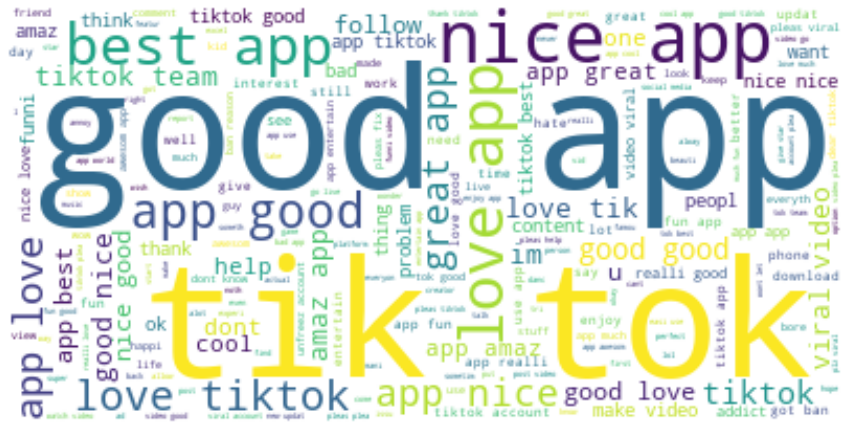

In [7]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHREE\AppData\Roaming\nltk_data...


                                             content  Positive  Negative  \
0                                               good     1.000       0.0   
1  awesom app mani peopl easier fb girl awesom gu...     0.381       0.0   
2                                                bad     0.000       1.0   
3                                               good     1.000       0.0   
4                                       interest app     0.750       0.0   

   Neutral  
0    0.000  
1    0.619  
2    0.000  
3    0.000  
4    0.250  


Now let’s have a look at the kind of words people use in the positive reviews of TikTok:

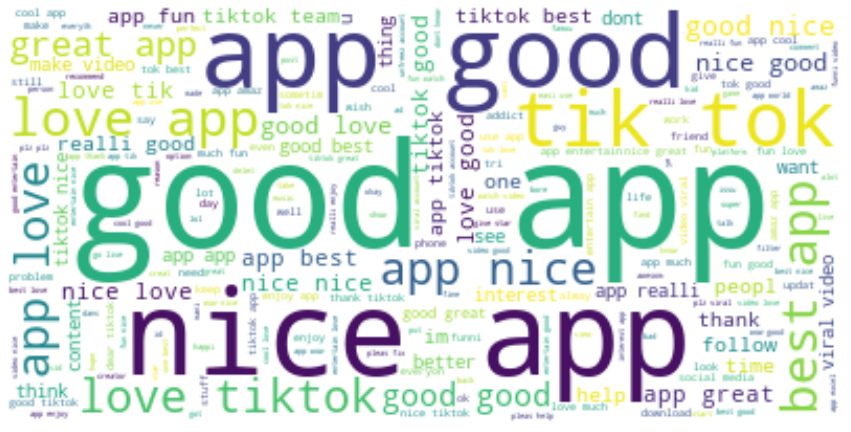

In [9]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the kind of words people often use in the negative reviews of TikTok:

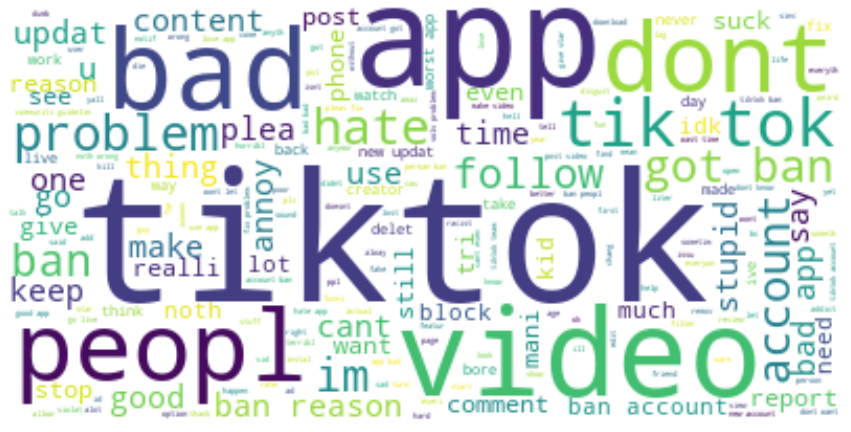

In [10]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Summary

So this is how to analyze the sentiments of the TikTok reviews. TikTok is famous for its short videos. People often use this app to watch entertaining and funny videos. Despite its entertaining content, this application is not liked by everyone.